544.874858751


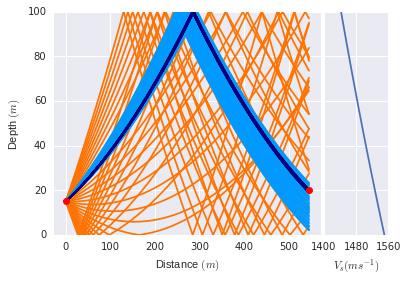

In [55]:
from bounos.ChartBuilders.ssp import UUV_time_delay, ssp_function, SSPS
%matplotlib inline
from matplotlib import pylab as plt
depth = 100
r=UUV_time_delay(SSP='n_squared', graph=1, depth=depth, dist_calc=False, 
                     pdf_plot={'filepath':'/dev/shm/test'})

544.874858751


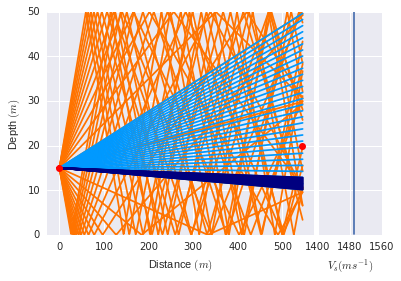

544.874858751


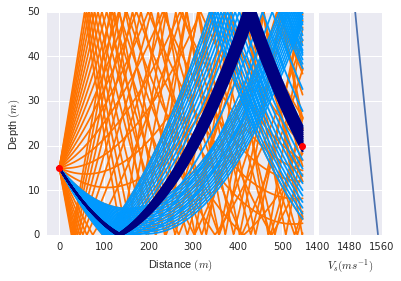

544.874858751


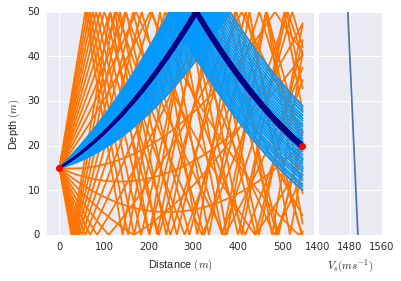

544.874858751


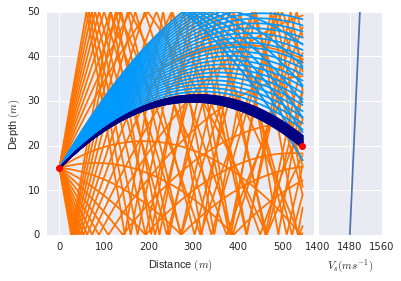

In [10]:
fs = {}
for SSP in SSPS:

    r=UUV_time_delay(SSP=SSP, graph=1, depth=depth, dist_calc=False, 
                     pdf_plot={'filepath':'/dev/shm/test'})


In [ ]:
f,ax=fs['n_squared']

In [ ]:
ax.set_xlabel("Distance")
ax.set_ylabel("Depth")

In [ ]:
f,ax = plt.subplots()

In [15]:
import scipy.io as sio
svp = sio.loadmat('/home/bolster/src/aietes/data/lev_ann.mat')['c']

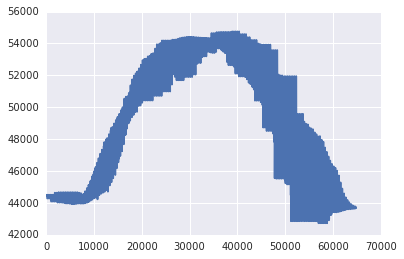

In [20]:
plt.plot(svp[:,0])

In [21]:
import netCDF4

In [25]:
netCDF4.Dataset('/home/bolster/Downloads/woa09/temperature_annual_1deg.nc')

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    dimensions(sizes): lon(360), lat(180), depth(33), time(1), nv(2)
    variables(dimensions): float32 depth(depth), float32 t_an(time,depth,lat,lon)
    groups: 

In [28]:
sp=netCDF4.Dataset('/home/bolster/Downloads/dbs/ssp/2WOA2009_SSP_Annual.nc').variables['ssp']

In [31]:
import xray

In [34]:
df = xray.open_dataset('/home/bolster/Downloads/dbs/ssp/2WOA2009_SSP_Annual.nc').to_dataframe()

In [50]:
df.xs(0,level='depth')

ssp
latitude longitude             
 89.5    -179.5     1436.697876
         -178.5     1436.751465
         -177.5     1436.807373
         -176.5     1436.848145
         -175.5     1436.879639
         -174.5     1436.891968
         -173.5     1436.899414
         -172.5     1436.902100
         -171.5     1436.901123
         -170.5     1436.897095
         -169.5     1436.898438
         -168.5     1436.901978
         -167.5     1436.951538
         -166.5     1436.995117
         -165.5     1437.051880
         -164.5     1437.071655
         -163.5     1437.076172
         -162.5     1437.061035
         -161.5     1437.017944
         -160.5     1436.964478
         -159.5     1436.879883
         -158.5     1436.789185
         -157.5     1436.698486
         -156.5     1436.613892
         -155.5     1436.550293
         -154.5     1436.502075
         -153.5     1436.468262
         -152.5     1436.437866
         -151.5     1436.405762
         -150.5     1436.391113
...                         ...
-89.5     150.5        0.000000
          151.5        0.000000
          152.5        0.000000
          153.5        0.000000
          154.5        0.000000
          155.5        0.000000
          156.5        0.000000
          157.5        0.000000
          158.5        0.000000
          159.5        0.000000
          160.5        0.000000
          161.5        0.000000
          162.5        0.000000
          163.5        0.000000
          164.5        0.000000
          165.5        0.000000
          166.5        0.000000
          167.5        0.000000
          168.5        0.000000
          169.5        0.000000
          170.5        0.000000
          171.5        0.000000
          172.5        0.000000
          173.5        0.000000
          174.5        0.000000
          175.5        0.000000
          176.5        0.000000
          177.5        0.000000
          178.5        0.000000
          179.5        0.000000

[64800 rows x 1 columns]

In [12]:
shared_h5_path = '/dev/shm/shared.h5'
results_path = "/home/bolster/src/aietes/results/Malicious Behaviour Trust Comparison-2015-07-20-17-47-53"
import pandas as pd
with pd.get_store(shared_h5_path) as store:
    joined = store.get('joined_target_weights_signed')
    
with pd.get_store(results_path + '.h5') as store:
    trust_observations = store.trust.dropna()
    v=list(trust_observations.index.levels[2])

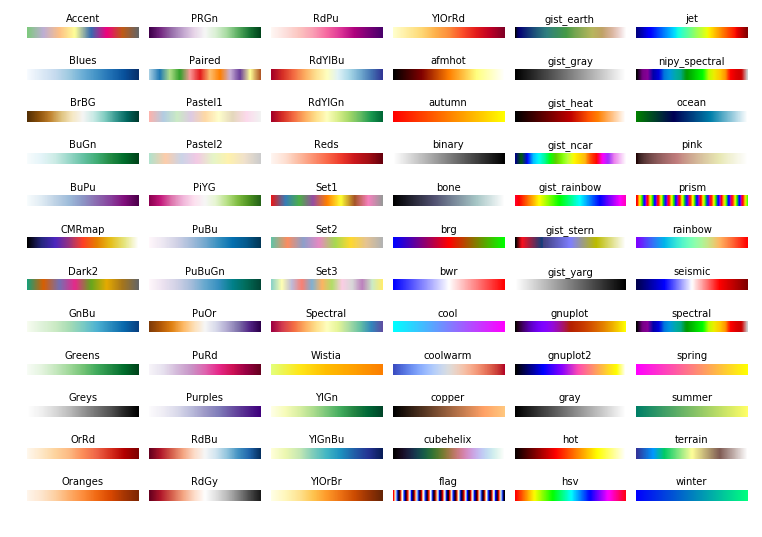

In [18]:
import matplotlib.pylab as plt
fig, axes = plt.subplots(36, 6, figsize=(10, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
                    hspace=0.1, wspace=0.1)

im = np.outer(np.ones(10), np.arange(100))

cmaps = [m for m in plt.cm.datad if not m.endswith("_r")]
cmaps.sort()

axes = axes.T.ravel()
for ax in axes:
    ax.axis('off')

for cmap, color_ax, gray_ax, null_ax in zip(cmaps, axes[1::3], axes[2::3], axes[::3]):
    del null_ax
    color_ax.set_title(cmap, fontsize=10)
    color_ax.imshow(im, cmap=cmap)
    #gray_ax.imshow(im, cmap=grayify_cmap(cmap))

In [17]:
%matplotlib inline

In [22]:
import palettable.colorbrewer.qualitative as cmap_qual
cmap_qual.get('Dark2_8'])

SyntaxError: invalid syntax (<ipython-input-22-0a401fc59fd5>, line 2)

In [31]:
import importlib
try:
    cm=importlib.import_module("palettable.colorbrewer.qualitative.Dark2_8")
    cm=getattr( cmap_qual, 'Dark2_4')
    plt.imshow(im, cmap=cm.mpl_colormap)
except:
    raise

ImportError: No module named Dark2_8

In [33]:
hasattr( cmap_qual, 'Dark2_8')

True

In [40]:
import os
os.chdir(results_path)

In [43]:
from aietes import Tools

In [57]:
results = Tools.uncpickle("/home/bolster/src/aietes/results/subset_analysis_raw.pkl")
_key_d = Tools.uncpickle("/dev/shm/_key_d")

In [45]:
len(results)

385

In [48]:
weights = {}
for r in results:
    if r is not None:
        weights.update(r['weights'])

In [49]:
weights.keys()

[('ADelay_ARXP_PLR_TXThroughput_INHD_Speed_only_feats_signed', u'SlowCoach'),
 ('ARXP_ATXP_INHD_Speed_only_feats_signed', u'STS'),
 ('ADelay_ATXP_PLR_TXThroughput_INDD_INHD_Speed_only_feats_signed',
  u'SlowCoach'),
 ('ADelay_ARXP_ATXP_RXThroughput_INDD_Speed_only_feats_signed', u'SlowCoach'),
 ('ADelay_ATXP_PLR_Speed_only_feats_signed', u'STS'),
 ('ADelay_RXThroughput_PLR_TXThroughput_only_feats_signed', u'STS'),
 ('ADelay_ARXP_INDD_INHD_only_feats_signed', u'Shadow'),
 ('ADelay_ARXP_RXThroughput_INHD_only_feats_signed', u'Shadow'),
 ('ADelay_ATXP_RXThroughput_PLR_INDD_INHD_Speed_only_feats_signed',
  u'SlowCoach'),
 ('ARXP_ATXP_PLR_INDD_INHD_only_feats_signed', u'STS'),
 ('ATXP_RXThroughput_PLR_INDD_only_feats_signed', u'MPC'),
 ('ADelay_ATXP_RXThroughput_INHD_only_feats_signed', u'MPC'),
 ('ARXP_RXThroughput_PLR_TXThroughput_INDD_INHD_only_feats_signed', u'Shadow'),
 ('ARXP_RXThroughput_PLR_INHD_Speed_only_feats_signed', u'STS'),
 ('ARXP_ATXP_RXThroughput_PLR_TXThroughput_only_feats

In [58]:
# Dump Best weights from best runs to a table
w_df = pd.concat([pd.Series(weight, index=_key_d[subset.lower()])
                  for (subset, _), weight in weights.items()],
                 keys=weights.keys(),
                 names=['subset', 'target', 'metric']).unstack(level='metric')

In [71]:
s= pd.get_store(os.path.join(results_path,'w_df.h5'))
s.keys()

[]

In [66]:
os.path.join(results_path,'w_df.h5')

'/home/bolster/src/aietes/results/Malicious Behaviour Trust Comparison-2015-07-20-17-47-53/w_df.h5'

In [73]:
inverted_results = Tools.uncpickle('/dev/shm/inverted_results')

In [74]:
inverted_results

defaultdict(list, {})